In [1]:
from sympy import *
from sympy.physics.mechanics import *
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#initialize mechanics printing
mechanics_printing()

In [4]:
# define all variables
## generalized coordinates
q1, q2, q3, q4, q5, q6 = dynamicsymbols('q1:7')

In [5]:
## time
t = Symbol('t')

## gravity
g = Symbol('g')
## masses
m1, m2, m3, m4, m5, m6 = symbols('m1:7')


## lengths
l1, l2, l3, l4, l5, l6 = symbols('l1:7')


In [6]:
# shortcut for derivatives:
q1d, q2d, q3d, q4d, q5d, q6d = dynamicsymbols('q1:7', 1)

In [7]:
#initialize fixed parameters
a0, a1, a2, a3, a4, a5 = symbols('a0:6')
alpha0, alpha1, alpha2, alpha3, alpha4, alpha5 = symbols('alpha0:6')
d1, d2, d3, d4, d5, d6 = symbols('d1:7')

In [8]:
# degrees to radians converter
dtr = pi/180

## Forward Kinematics

The Position of the End-effector with respect to the base fram can be expressed as a multiplication of all of the transformation Matrices of the individual joints.

$$ _{0}^{EE}\textrm{T} = _{0}^{1}\textrm{T}_{1}^{2}\textrm{T} _{2}^{3} \textrm{T} _{3}^{4} \textrm{T} _{4}^{5} \textrm{T} _{5}^{6} \textrm{T} _{6}^{EE} \textrm{T} $$

Forunately the Denavit Hartenberg parameters are given by the  manufacturer of our example robot. So we can obtain the individual transformation Matrices by applying the DH parameters in the DH Transformation Matrix.


In [9]:
def dh_transformation_step(alpha, a, d, q):
    """
    returns a DH Transformation matrix.
    """
    transformation_matrix = Matrix([
        [cos(q), -sin(q), 0, a],
        [sin(q) * cos(alpha), cos(q) * cos(alpha), -sin(alpha), -sin(alpha) * d],
        [sin(q) * sin(alpha), cos(q) * sin(alpha), cos(alpha), cos(alpha) * d],
        [0, 0, 0, 1]
    ])
    return transformation_matrix

In [10]:
#define the denavit hartenberg parameters of the UR5
dh_params = {
    a0: 0.0, alpha0: 0,
    a1: 0.0, alpha1: pi/2, d1: 0.08916, q1: q1,
    a2: 0.425, alpha2: 0, d2: 0, q2: q2,
    a3: 0.39225, alpha3: 0, d3: 0, q3: q3,
    a4: 0, alpha4: pi/2, d4: 0.10915, q4: q4,
    a5: 0, alpha5: -pi/2, d5: 0.09456, q5: q5,
    d6: 0.0823, q6:q6
}

In [11]:
# calculate individual transformation matrices 
T01 = dh_transformation_step(alpha0, a0, d1, q1).subs(dh_params)
T12 = dh_transformation_step(alpha1, a1, d2, q2).subs(dh_params)
T23 = dh_transformation_step(alpha2, a2, d3, q3).subs(dh_params)
T34 = dh_transformation_step(alpha3, a3, d4, q4).subs(dh_params)
T45 = dh_transformation_step(alpha4, a4, d5, q5).subs(dh_params)
T56 = dh_transformation_step(alpha5, a5, d6, q6).subs(dh_params)

In [12]:
def get_positions(q1n, q2n, q3n, q4n, q5n, q6n):
    """takes radian values for each joints. Returns positions of each joint and End-Effector"""
    global T01, T12, T23, T34, T45, T56
    T01 = T01
    T02 = T01 * T12
    T03 = T02 * T23
    T04 = T03 * T34
    T05 = T04 * T45
    T06 = T05 * T56
    
    joint0 = [0.0, 0.0, 0.0]
    joint1 = T01.subs({q1: q1n, q2: q2n, q3: q3n, q4: q4n, q5: q5n, q6: q6n})[:, 3][:3]
    joint2 = T02.subs({q1: q1n, q2: q2n, q3: q3n, q4: q4n, q5: q5n, q6: q6n})[:, 3][:3]
    joint3 = T03.subs({q1: q1n, q2: q2n, q3: q3n, q4: q4n, q5: q5n, q6: q6n})[:, 3][:3]
    joint4 = T04.subs({q1: q1n, q2: q2n, q3: q3n, q4: q4n, q5: q5n, q6: q6n})[:, 3][:3]
    joint5 = T05.subs({q1: q1n, q2: q2n, q3: q3n, q4: q4n, q5: q5n, q6: q6n})[:, 3][:3]
    joint6 = T06.subs({q1: q1n, q2: q2n, q3: q3n, q4: q4n, q5: q5n, q6: q6n})[:, 3][:3]
    return joint0, joint1, joint2, joint3, joint4, joint5, joint6

In [13]:
j0, j1, j2, j3, j4, j5, j6 = get_positions(0, pi/2, 0, pi/2, 0, 0)

In [14]:
def plot2dxz(pointlist):
    """takes list of points and plots in 2D space"""
    x = []
    y = []
    z = []
    for p in pointlist:
        x.append(p[0])
        y.append(p[1])
        z.append(p[2])
    plt.scatter(x, z)
    plt.xlabel('x')
    plt.ylabel('z')

In [15]:
def plot2dyz(pointlist):
    """takes list of points and plots in 2D space"""
    x = []
    y = []
    z = []
    for p in pointlist:
        x.append(p[0])
        y.append(p[1])
        z.append(p[2])
    plt.scatter(y, z)
    plt.xlabel('y')
    plt.ylabel('z')

In [16]:
def plot2dxy(pointlist):
    """takes list of points and plots in 2D space"""
    x = []
    y = []
    z = []
    for p in pointlist:
        x.append(p[0])
        y.append(p[1])
        z.append(p[2])
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')

In [17]:
def plot2dxyz(pointlist):
    """takes list of points and plots in 2D space"""
    x = []
    y = []
    z = []
    names = ['j0', 'j1', 'j2', 'j3', 'j4', 'j5', 'j6']

    for p in pointlist:
        x.append(p[0])
        y.append(p[1])
        z.append(p[2])
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    f.set_figheight(5)
    f.set_figwidth(15)
    ax1.scatter(x, z, c = ['red','blue','yellow','purple','cyan','brown'])
    ax1.set_title('XZ')
    ax1.set_xlim(-1.0, 1.0)
    ax1.set_ylim(-0.05, 1.3)
    ax2.scatter(y, z, c = ['red','blue','yellow','purple','cyan','brown'])
    ax2.set_title('YZ')
    ax2.set_xlim(-1.0, 1.0)
    ax2.set_ylim(-0.05, 1.3)
    for i, txt in enumerate(names):
        ax1.annotate(txt, (x[i],z[i]))
        ax2.annotate(txt, (y[i],z[i]))


In [18]:
j0, j1, j2, j3, j4, j5, j6 = get_positions(0, pi/2, 0, pi/2, 0, 0)

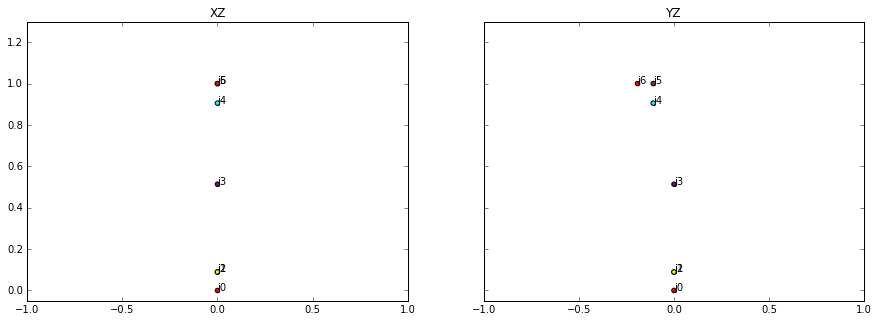

In [19]:
plot2dxyz([j0, j1, j2, j3, j4, j5, j6])

In [20]:
j2_90degrees = get_positions(0, pi/2 - 90* dtr, 0, pi/2, 0, 0)

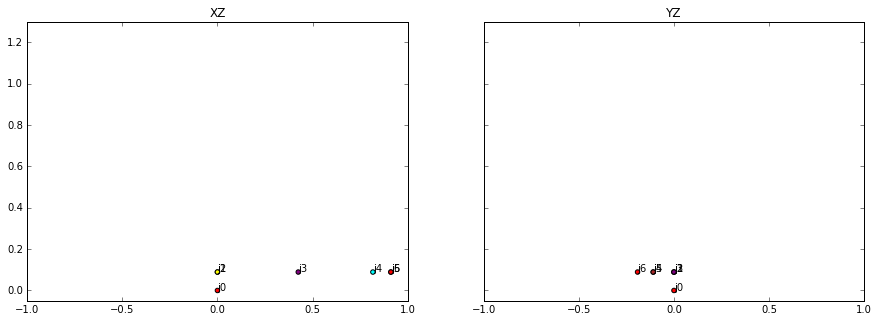

In [21]:
plot2dxyz(j2_90degrees)

In [22]:
j3_90degrees = get_positions(0, pi/2, - 90*dtr, pi/2, 0, 0)

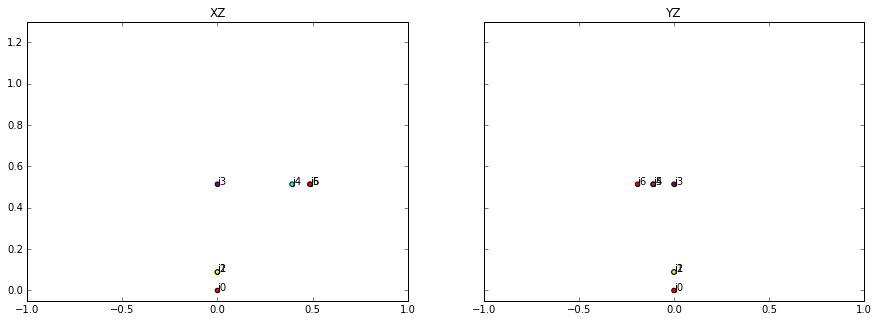

In [23]:
plot2dxyz(j3_90degrees)

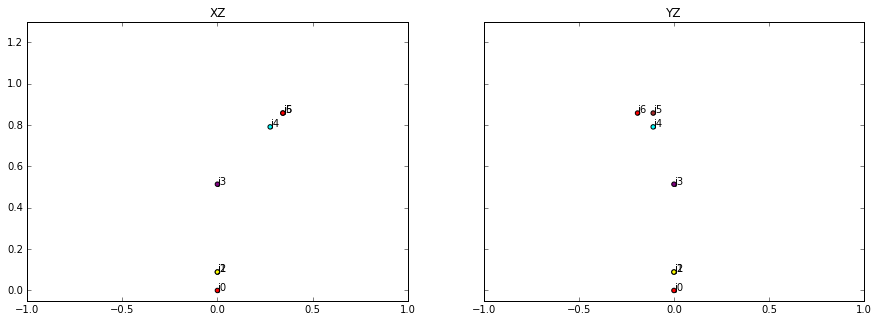

In [24]:
j3_45degrees = get_positions(0, pi/2, - 45*dtr, pi/2, 0, 0)
plot2dxyz(j3_45degrees)

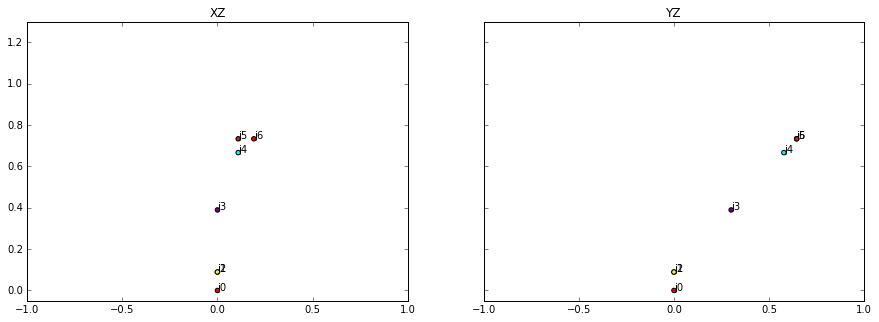

In [25]:
j1_45degrees = get_positions(90 *dtr, pi/2 -45*dtr, 0, pi/2, 0, 0)
plot2dxyz(j1_45degrees)

## General expressions of the coordinates

In [104]:
T01g = dh_transformation_step(alpha0, a0, d1, q1).subs(statics)
T12g = dh_transformation_step(alpha1, a1, d2, q2).subs(statics)
T23g = dh_transformation_step(alpha2, a2, d3, q3).subs(statics)
T34g = dh_transformation_step(alpha3, a3, d4, q4).subs(statics)
T45g = dh_transformation_step(alpha4, a4, d5, q5).subs(statics)
T56g = dh_transformation_step(alpha5, a5, d6, q6).subs(statics)

In [105]:
j1g = Matrix((T01g)[:, 3].subs(dh_params)[:3])
j2g = Matrix((T01g * T12g)[:, 3].subs(dh_params)[:3])
j3g = Matrix((T01g * T12g * T23g)[:, 3].subs(dh_params)[:3])
j4g = Matrix((T01g * T12g * T23g * T34g)[:, 3].subs(dh_params)[:3])
j5g = Matrix((T01g * T12g * T23g * T34g * T45g)[:, 3].subs(dh_params)[:3])
j6g = Matrix((T01g * T12g * T23g * T34g * T45g * T56g)[:, 3].subs(dh_params)[:3])

In [139]:
statics = {
    a0: 0.0, alpha0: 0,
    a1: 0.0, alpha1: pi/2, d1: d1, q1: q1,
    a2: a2, alpha2: 0, d2: 0, q2: q2,
    a3: a3, alpha3: 0, d3: 0, q3: q3,
    a4: 0, alpha4: pi/2, d4: d4, q4: q4,
    a5: 0, alpha5: -pi/2, d5: d5, q5: q5,
    d6: d6, q6:q6
}

In [140]:
j1g = Matrix((T01g)[:, 3].subs(statics)[:3])
j2g = Matrix((T01g * T12g)[:, 3].subs(statics)[:3])
j3g = Matrix((T01g * T12g * T23g)[:, 3].subs(statics)[:3])
j4g = Matrix((T01g * T12g * T23g * T34g)[:, 3].subs(statics)[:3])
j5g = Matrix((T01g * T12g * T23g * T34g * T45g)[:, 3].subs(statics)[:3])
j6g = Matrix((T01g * T12g * T23g * T34g * T45g * T56g)[:, 3].subs(statics)[:3])

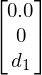

In [141]:
j1g

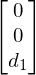

In [142]:
j2g

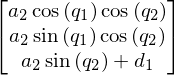

In [143]:
j3g

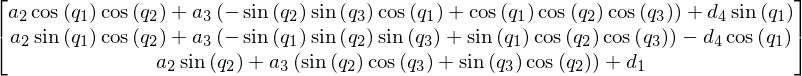

In [144]:
j4g

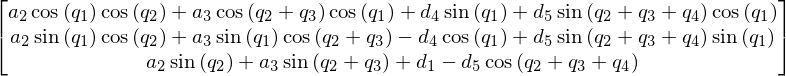

In [145]:
simplify(j5g)

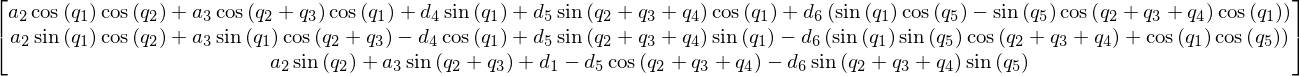

In [146]:
simplify(j6g)

## Lagrange for each joint

In [147]:
# Lagrange joint 2
j1gd = Derivative(j1g[2], t)

In [148]:
Derivative(j3g[2], t)

In [149]:
def joint_velocities(joint):
    """
    takes a joint x,y,z and returns its velocity as Matrix
    """
    vel_matrix = []
    for i in joint:
        vel_matrix.append(simplify(Derivative(i, t)))
    return Matrix(vel_matrix)

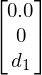

In [150]:
j1g

In [151]:
j1v = joint_velocities(j1g)
j1v

⎡d      ⎤
⎢──(0.0)⎥
⎢dt     ⎥
⎢       ⎥
⎢ d     ⎥
⎢ ──(0) ⎥
⎢ dt    ⎥
⎢       ⎥
⎢d      ⎥
⎢──(d₁) ⎥
⎣dt     ⎦

In [152]:
j2v = joint_velocities(j2g)
j2v

⎡d     ⎤
⎢──(0) ⎥
⎢dt    ⎥
⎢      ⎥
⎢d     ⎥
⎢──(0) ⎥
⎢dt    ⎥
⎢      ⎥
⎢d     ⎥
⎢──(d₁)⎥
⎣dt    ⎦

In [153]:
j3v = joint_velocities(j3g)
j3v

⎡∂                     ⎤
⎢──(a₂⋅cos(q₁)⋅cos(q₂))⎥
⎢∂t                    ⎥
⎢                      ⎥
⎢∂                     ⎥
⎢──(a₂⋅sin(q₁)⋅cos(q₂))⎥
⎢∂t                    ⎥
⎢                      ⎥
⎢ ∂                    ⎥
⎢ ──(a₂⋅sin(q₂) + d₁)  ⎥
⎣ ∂t                   ⎦

In [154]:
j4v = joint_velocities(j4g)
j4v

⎡∂                                                            ⎤
⎢──(a₂⋅cos(q₁)⋅cos(q₂) + a₃⋅cos(q₂ + q₃)⋅cos(q₁) + d₄⋅sin(q₁))⎥
⎢∂t                                                           ⎥
⎢                                                             ⎥
⎢∂                                                            ⎥
⎢──(a₂⋅sin(q₁)⋅cos(q₂) + a₃⋅sin(q₁)⋅cos(q₂ + q₃) - d₄⋅cos(q₁))⎥
⎢∂t                                                           ⎥
⎢                                                             ⎥
⎢            ∂                                                ⎥
⎢            ──(a₂⋅sin(q₂) + a₃⋅sin(q₂ + q₃) + d₁)            ⎥
⎣            ∂t                                               ⎦

In [155]:
j5v = joint_velocities(j5g)
j5v

⎡∂                                                                            
⎢──(a₂⋅cos(q₁)⋅cos(q₂) + a₃⋅cos(q₂ + q₃)⋅cos(q₁) + d₄⋅sin(q₁) + d₅⋅sin(q₂ + q₃
⎢∂t                                                                           
⎢                                                                             
⎢∂                                                                            
⎢──(a₂⋅sin(q₁)⋅cos(q₂) + a₃⋅sin(q₁)⋅cos(q₂ + q₃) - d₄⋅cos(q₁) + d₅⋅sin(q₂ + q₃
⎢∂t                                                                           
⎢                                                                             
⎢                ∂                                                            
⎢                ──(a₂⋅sin(q₂) + a₃⋅sin(q₂ + q₃) + d₁ - d₅⋅cos(q₂ + q₃ + q₄)) 
⎣                ∂t                                                           

               ⎤
 + q₄)⋅cos(q₁))⎥
               ⎥
               ⎥
               ⎥
 + q₄)⋅sin(q₁))⎥
               ⎥
           

In [156]:
j6v = joint_velocities(j6g)
j6v

⎡∂                                                                            
⎢──(a₂⋅cos(q₁)⋅cos(q₂) + a₃⋅cos(q₂ + q₃)⋅cos(q₁) + d₄⋅sin(q₁) + d₅⋅sin(q₂ + q₃
⎢∂t                                                                           
⎢                                                                             
⎢∂                                                                            
⎢──(a₂⋅sin(q₁)⋅cos(q₂) + a₃⋅sin(q₁)⋅cos(q₂ + q₃) - d₄⋅cos(q₁) + d₅⋅sin(q₂ + q₃
⎢∂t                                                                           
⎢                                                                             
⎢                              ∂                                              
⎢                              ──(a₂⋅sin(q₂) + a₃⋅sin(q₂ + q₃) + d₁ - d₅⋅cos(q
⎣                              ∂t                                             

                                                                          ⎤
 + q₄)⋅cos(q₁) + d₆⋅(sin(q₁)⋅cos(q₅) - sin(q₅)⋅cos(q₂ 

The Lagrange is calculated as 
$$L = T - V$$
, where T is the kinetic energy of the System and V is the potential energy of the system.
We begin with deriving the kinetic energy in joint 3 which is the sum of the kinetic ennergies of Ekinjoint1, Ekinjoint2 and Ekin joint3:
$$E_{kin} = \frac{1}{2} * m + \dot{x}$$

We need to take the velocities in all directions into account

In [157]:
ekin1 = 1/2 * m1 * (j1v[0]**2 + j1v[1]**2 + j1v[2]**2)
ekin1

       ⎛         2          2           2⎞
       ⎜⎛d      ⎞    ⎛d    ⎞    ⎛d     ⎞ ⎟
0.5⋅m₁⋅⎜⎜──(0.0)⎟  + ⎜──(0)⎟  + ⎜──(d₁)⎟ ⎟
       ⎝⎝dt     ⎠    ⎝dt   ⎠    ⎝dt    ⎠ ⎠

In [158]:
ekin2 = 1/2 * m2 * (j2v[0]**2 + j2v[1]**2 + j2v[2]**2)
ekin2

       ⎛         2           2⎞
       ⎜  ⎛d    ⎞    ⎛d     ⎞ ⎟
0.5⋅m₂⋅⎜2⋅⎜──(0)⎟  + ⎜──(d₁)⎟ ⎟
       ⎝  ⎝dt   ⎠    ⎝dt    ⎠ ⎠

In [159]:
ekin3 = 1/2 * m3 * (j3v[0]**2 + j3v[1]**2 + j3v[2]**2)
ekin3

       ⎛                        2                           2                 
       ⎜⎛∂                     ⎞    ⎛∂                     ⎞    ⎛∂            
0.5⋅m₃⋅⎜⎜──(a₂⋅sin(q₁)⋅cos(q₂))⎟  + ⎜──(a₂⋅cos(q₁)⋅cos(q₂))⎟  + ⎜──(a₂⋅sin(q₂)
       ⎝⎝∂t                    ⎠    ⎝∂t                    ⎠    ⎝∂t           

       2⎞
      ⎞ ⎟
 + d₁)⎟ ⎟
      ⎠ ⎠

In [160]:
epot3 = (m3 + m4 + m5 + m6) * j3g[2] * g
epot3

In [161]:
V3 = epot3
T3 = ekin1 + ekin2 + ekin3

In [162]:
T3

       ⎛         2          2           2⎞          ⎛         2           2⎞  
       ⎜⎛d      ⎞    ⎛d    ⎞    ⎛d     ⎞ ⎟          ⎜  ⎛d    ⎞    ⎛d     ⎞ ⎟  
0.5⋅m₁⋅⎜⎜──(0.0)⎟  + ⎜──(0)⎟  + ⎜──(d₁)⎟ ⎟ + 0.5⋅m₂⋅⎜2⋅⎜──(0)⎟  + ⎜──(d₁)⎟ ⎟ +
       ⎝⎝dt     ⎠    ⎝dt   ⎠    ⎝dt    ⎠ ⎠          ⎝  ⎝dt   ⎠    ⎝dt    ⎠ ⎠  

        ⎛                        2                           2                
        ⎜⎛∂                     ⎞    ⎛∂                     ⎞    ⎛∂           
 0.5⋅m₃⋅⎜⎜──(a₂⋅sin(q₁)⋅cos(q₂))⎟  + ⎜──(a₂⋅cos(q₁)⋅cos(q₂))⎟  + ⎜──(a₂⋅sin(q₂
        ⎝⎝∂t                    ⎠    ⎝∂t                    ⎠    ⎝∂t          

        2⎞
       ⎞ ⎟
) + d₁)⎟ ⎟
       ⎠ ⎠

In order to calculate the Lagranges we need to derive the equations of T with respect to the generalized coordinates
$$\frac{\partial T_{3}}{\partial q_{1}}$$

In [163]:
diff(T3, q1)

       ⎛                     ∂                                                
0.5⋅m₃⋅⎜2⋅a₂⋅sin(q₁)⋅sin(q₂)⋅──(a₂⋅cos(q₁)⋅cos(q₂))⋅q₂̇ - 2⋅a₂⋅sin(q₂)⋅cos(q₁)
       ⎝                     ∂t                                               

 ∂                         ⎞
⋅──(a₂⋅sin(q₁)⋅cos(q₂))⋅q₂̇⎟
 ∂t                        ⎠

$$\frac{\partial T_{3}}{\partial q_{2}}$$

In [164]:
diff(T3, q2)

       ⎛                     ∂                                                
0.5⋅m₃⋅⎜2⋅a₂⋅sin(q₁)⋅sin(q₂)⋅──(a₂⋅cos(q₁)⋅cos(q₂))⋅q₁̇ - 2⋅a₂⋅sin(q₂)⋅cos(q₁)
       ⎝                     ∂t                                               

 ∂                         ⎞
⋅──(a₂⋅sin(q₁)⋅cos(q₂))⋅q₁̇⎟
 ∂t                        ⎠

$$\frac{\partial T_{3}}{\partial \dot{q_{1}}}$$

In [165]:
Derivative(T3, q1d)

$$\frac{\partial T_{3}}{\partial \dot{q_{2}}}$$

In [166]:
Derivative(T3, q2d)

$$\frac{d }{d t}\left (\frac{\partial T_{3}}{\partial \dot {q_{1}}}  \right )$$

In [167]:
Derivative(Derivative(T3, q1d), t)

$$\frac{d }{d t}\left (\frac{\partial T_{3}}{\partial \dot {q_{2}}}  \right )$$

In [168]:
Derivative(Derivative(T3, q2d), t)

$$\frac{d }{d t}\left (\frac{\partial T_{3}}{\partial \dot {q_{3}}}  \right )$$

In [169]:
Derivative(Derivative(T3, q3d), t)

$$\frac{\partial V_{3}}{\partial q_{1}}$$

In [170]:
V3

In [171]:
Derivative(V3, q1)

$$\tau_{1}, \tau_{2}$$

In [176]:
tau31 = simplify(Derivative(Derivative(T3, q1d), t) - Derivative(T3, q1) - Derivative(V3, q1))
tau31

                                                    ⎛    ⎛   ⎛         2      
   ∂                                              ∂ ⎜    ⎜   ⎜⎛d      ⎞    ⎛d 
- ───(g⋅(a₂⋅sin(q₂) + d₁)⋅(m₃ + m₄ + m₅ + m₆)) - ───⎜0.5⋅⎜m₁⋅⎜⎜──(0.0)⎟  + ⎜──
  ∂q₁                                            ∂q₁⎝    ⎝   ⎝⎝dt     ⎠    ⎝dt

    2           2⎞      ⎛         2           2⎞      ⎛                       
   ⎞    ⎛d     ⎞ ⎟      ⎜  ⎛d    ⎞    ⎛d     ⎞ ⎟      ⎜⎛∂                     
(0)⎟  + ⎜──(d₁)⎟ ⎟ + m₂⋅⎜2⋅⎜──(0)⎟  + ⎜──(d₁)⎟ ⎟ + m₃⋅⎜⎜──(a₂⋅sin(q₁)⋅cos(q₂))
   ⎠    ⎝dt    ⎠ ⎠      ⎝  ⎝dt   ⎠    ⎝dt    ⎠ ⎠      ⎝⎝∂t                    

 2                           2                        2⎞⎞⎞
⎞    ⎛∂                     ⎞    ⎛∂                  ⎞ ⎟⎟⎟
⎟  + ⎜──(a₂⋅cos(q₁)⋅cos(q₂))⎟  + ⎜──(a₂⋅sin(q₂) + d₁)⎟ ⎟⎟⎟
⎠    ⎝∂t                    ⎠    ⎝∂t                 ⎠ ⎠⎠⎠

In [177]:
tau32 = simplify(Derivative(Derivative(T3, q2d), t) - Derivative(T3, q2) - Derivative(V3, q2))
tau32

                                                    ⎛    ⎛   ⎛         2      
   ∂                                              ∂ ⎜    ⎜   ⎜⎛d      ⎞    ⎛d 
- ───(g⋅(a₂⋅sin(q₂) + d₁)⋅(m₃ + m₄ + m₅ + m₆)) - ───⎜0.5⋅⎜m₁⋅⎜⎜──(0.0)⎟  + ⎜──
  ∂q₂                                            ∂q₂⎝    ⎝   ⎝⎝dt     ⎠    ⎝dt

    2           2⎞      ⎛         2           2⎞      ⎛                       
   ⎞    ⎛d     ⎞ ⎟      ⎜  ⎛d    ⎞    ⎛d     ⎞ ⎟      ⎜⎛∂                     
(0)⎟  + ⎜──(d₁)⎟ ⎟ + m₂⋅⎜2⋅⎜──(0)⎟  + ⎜──(d₁)⎟ ⎟ + m₃⋅⎜⎜──(a₂⋅sin(q₁)⋅cos(q₂))
   ⎠    ⎝dt    ⎠ ⎠      ⎝  ⎝dt   ⎠    ⎝dt    ⎠ ⎠      ⎝⎝∂t                    

 2                           2                        2⎞⎞⎞
⎞    ⎛∂                     ⎞    ⎛∂                  ⎞ ⎟⎟⎟
⎟  + ⎜──(a₂⋅cos(q₁)⋅cos(q₂))⎟  + ⎜──(a₂⋅sin(q₂) + d₁)⎟ ⎟⎟⎟
⎠    ⎝∂t                    ⎠    ⎝∂t                 ⎠ ⎠⎠⎠

...finally the equations of motions are: 

In [179]:
Eq(tau31, 0)

In [178]:
Eq(tau32, 0)

In [187]:
ekin4 = 1/2 * m4 * (j4v[0]**2 + j4v[1]**2 + j4v[2]**2)
ekin4

       ⎛                                       2                              
       ⎜⎛∂                                    ⎞    ⎛∂                         
0.5⋅m₄⋅⎜⎜──(a₂⋅sin(q₂) + a₃⋅sin(q₂ + q₃) + d₁)⎟  + ⎜──(a₂⋅sin(q₁)⋅cos(q₂) + a₃
       ⎝⎝∂t                                   ⎠    ⎝∂t                        

                                    2                                         
                                   ⎞    ⎛∂                                    
⋅sin(q₁)⋅cos(q₂ + q₃) - d₄⋅cos(q₁))⎟  + ⎜──(a₂⋅cos(q₁)⋅cos(q₂) + a₃⋅cos(q₂ + q
                                   ⎠    ⎝∂t                                   

                         2⎞
                        ⎞ ⎟
₃)⋅cos(q₁) + d₄⋅sin(q₁))⎟ ⎟
                        ⎠ ⎠

In [188]:
V4 = (m4 + m5 + m6) * j4g[2] * g

In [189]:
T4 = ekin1 + ekin2 + ekin3 + ekin4

In [190]:
diff(T4, q1)

       ⎛                     ∂                                                
0.5⋅m₃⋅⎜2⋅a₂⋅sin(q₁)⋅sin(q₂)⋅──(a₂⋅cos(q₁)⋅cos(q₂))⋅q₂̇ - 2⋅a₂⋅sin(q₂)⋅cos(q₁)
       ⎝                     ∂t                                               

 ∂                         ⎞          ⎛                                       
⋅──(a₂⋅sin(q₁)⋅cos(q₂))⋅q₂̇⎟ + 0.5⋅m₄⋅⎜(2⋅a₂⋅sin(q₁)⋅sin(q₂)⋅q₂̇ + 2⋅a₃⋅(q₂̇ +
 ∂t                        ⎠          ⎝                                       

                            ∂                                                 
 q₃̇)⋅sin(q₂ + q₃)⋅sin(q₁))⋅──(a₂⋅cos(q₁)⋅cos(q₂) + a₃⋅cos(q₂ + q₃)⋅cos(q₁) + 
                            ∂t                                                

                                                                              
d₄⋅sin(q₁)) + (-2⋅a₂⋅sin(q₂)⋅cos(q₁)⋅q₂̇ - 2⋅a₃⋅(q₂̇ + q₃̇)⋅sin(q₂ + q₃)⋅cos(q
                                                                              

    ∂                                           

In [191]:
Derivative(T4, q2)

In [192]:
Derivative(T4, q3)

In [193]:
Derivative(T4, q1d)

In [194]:
Derivative(T4, q2d)

In [195]:
Derivative(T4, q3d)

In [84]:
Derivative(Derivative(T4, q3d), t)

In [85]:
Derivative(Derivative(T4, q2d), t)

In [87]:
tau41 = simplify(Derivative(Derivative(T4, q1d), t) - Derivative(T4, q1) - Derivative(V4, q1))

In [88]:
tau42 = simplify(Derivative(Derivative(T4, q2d), t) - Derivative(T4, q2) - Derivative(V4, q2))

In [90]:
tau43 = simplify(Derivative(Derivative(T4, q3d), t) - Derivative(T4, q3) - Derivative(V4, q3))

In [95]:
#q1 
Eq(tau41, 0)

In [96]:
#q2
Eq(tau42, 0)

In [97]:
#q3
Eq(tau43, 0)

In [196]:
ekin5 = 1/2 * m5 * (j5v[0]**2 + j5v[1]**2 + j5v[2]**2)

In [197]:
T5 = ekin1 + ekin2 + ekin3 + ekin4 + ekin5

In [198]:
V5 = (m5 + m6) * j5g[2] * g

In [199]:
tau51 = simplify(Derivative(Derivative(T5, q1d), t) - Derivative(T5, q1) - Derivative(V5, q1))

In [200]:
tau52 = simplify(Derivative(Derivative(T5, q2d), t) - Derivative(T5, q2) - Derivative(V5, q2))

In [201]:
tau53 = simplify(Derivative(Derivative(T5, q3d), t) - Derivative(T5, q3) - Derivative(V5, q3))

In [202]:
tau54 = simplify(Derivative(Derivative(T5, q4d), t) - Derivative(T5, q4) - Derivative(V5, q4))

In [203]:
#q1
Eq(tau51, 0)

In [204]:
ekin6 = 1/2 * m6 * (j6v[0]**2 + j6v[1]**2 + j6v[2]**2)

In [205]:
T6 = ekin1 + ekin2 + ekin3 + ekin4 + ekin5 + ekin6

In [206]:
V6 = m6 * j6g[2] * g

In [207]:
tau61 = simplify(Derivative(Derivative(T6, q1d), t) - Derivative(T6, q1) - Derivative(V6, q1))

In [208]:
tau62 = simplify(Derivative(Derivative(T6, q2d), t) - Derivative(T6, q2) - Derivative(V6, q2))

In [209]:
tau63 = simplify(Derivative(Derivative(T6, q3d), t) - Derivative(T6, q3) - Derivative(V6, q3))

In [210]:
tau64 = simplify(Derivative(Derivative(T6, q4d), t) - Derivative(T6, q4) - Derivative(V6, q4))

In [211]:
tau65 = simplify(Derivative(Derivative(T6, q5d), t) - Derivative(T6, q5) - Derivative(V6, q5))